## **Project - Online Book Store WEB SCRAPING**

**PERFORM WEB SCRAPING ON BOOK STORE http://books.toscrape.com/**


What we need:
  * pages
  * prices
  * ratings
  * title
  * urls(images)

In [ ]:
#creating empty lists
pages=[]
prices=[]
ratings=[]
title=[]
urls=[]

no_of_pages= 1 #number of pages to be selected

#looping through the required pages and selecting the pages accordingly
for i in range(1,no_of_pages+1):   #to include the last page
    url=('http://books.toscrape.com/catalogue/page-{}.html'.format(i))

    pages.append(url) #adding all the content of the respective pages to our created page list

In [ ]:
print('Number of pages:',len(pages))
print(pages)

Number of pages: 1
['http://books.toscrape.com/catalogue/page-1.html']


**Getting the data from the particular page url and converting from object of type 'request to object of type beautiful soup, making it more readable**

In [ ]:
import requests            #to make request to the required page
import bs4                 #contains beautifulSoup for pulling data out of HTML and XML files
import pandas as pd        #to convert our data to a dataframe

In [ ]:
for item in pages:
    page=requests.get(item)
    soup=bs4.BeautifulSoup(page.text,'html.parser')

In [ ]:
print(soup)


<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:30" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="../static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link 

In an actual html tag, it includes indentations and nested tags that helps you to identify the actual relationship between tags and so forth. In order to get that identation and relationship here, we have to use what is called **prettify()**.

**“prettify()”** is a built-in function provided by the Beautiful Soup module which gives the visual representation of the parsed URL Source code. i.e. it arranges all the tags in a parse-tree manner with better readability.

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:30" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="../static/oscar/css/styles.css" rel="stylesheet" typ

## **Finding all the Titles**

In [ ]:
#print all the titles
for t in soup.findAll('h3'):
    print(t)

<h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<h3><a href="tipping-the-velvet_999/index.html" title="Tipping the Velvet">Tipping the Velvet</a></h3>
<h3><a href="soumission_998/index.html" title="Soumission">Soumission</a></h3>
<h3><a href="sharp-objects_997/index.html" title="Sharp Objects">Sharp Objects</a></h3>
<h3><a href="sapiens-a-brief-history-of-humankind_996/index.html" title="Sapiens: A Brief History of Humankind">Sapiens: A Brief History ...</a></h3>
<h3><a href="the-requiem-red_995/index.html" title="The Requiem Red">The Requiem Red</a></h3>
<h3><a href="the-dirty-little-secrets-of-getting-your-dream-job_994/index.html" title="The Dirty Little Secrets of Getting Your Dream Job">The Dirty Little Secrets ...</a></h3>
<h3><a href="the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html" title="The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria 

In [ ]:
#find all the title and add to our empty title list
for t in soup.findAll('h3'):
    titless=t.getText()
    title.append(titless)

In [ ]:
titless

"It's Only the Himalayas"

In [ ]:
title

['A Light in the ...',
 'Tipping the Velvet',
 'Soumission',
 'Sharp Objects',
 'Sapiens: A Brief History ...',
 'The Requiem Red',
 'The Dirty Little Secrets ...',
 'The Coming Woman: A ...',
 'The Boys in the ...',
 'The Black Maria',
 'Starving Hearts (Triangular Trade ...',
 "Shakespeare's Sonnets",
 'Set Me Free',
 "Scott Pilgrim's Precious Little ...",
 'Rip it Up and ...',
 'Our Band Could Be ...',
 'Olio',
 'Mesaerion: The Best Science ...',
 'Libertarianism for Beginners',
 "It's Only the Himalayas"]

##**Finding all the Prices**

In [ ]:
#find all the prices
for p in soup.find_all('p', class_='price_color'): #the 'p' tag is in the 'price color' class. NB. Make sure to add underscore to class (class_) in order to differentiate it from python inbuilt class
    price=p.getText()
    prices.append(price)

In [ ]:
price

'Â£45.17'

In [ ]:
print(prices)

['Â£51.77', 'Â£53.74', 'Â£50.10', 'Â£47.82', 'Â£54.23', 'Â£22.65', 'Â£33.34', 'Â£17.93', 'Â£22.60', 'Â£52.15', 'Â£13.99', 'Â£20.66', 'Â£17.46', 'Â£52.29', 'Â£35.02', 'Â£57.25', 'Â£23.88', 'Â£37.59', 'Â£51.33', 'Â£45.17']


##**Finding all the Ratings**

In [ ]:
#getting the ratings
for s in soup.find_all('p',class_='star-rating'):
    for k,v in s.attrs.items(): #to read about attr: https://www.attrs.org/en/stable/, k will contain the class(u can print(k) to see what is inside, V is going to contain a list like ['star-rating', 'Two'], we use v[1] to get the second item which is the actual ratings)
        star=v[1]
        ratings.append(star)
        print(star) #our star list now contains all of the star-ratings of the books
        

Three
One
One
Four
Five
One
Four
Three
Four
One
Two
Four
Five
Five
Five
Three
One
One
Two
Two


In [ ]:
k

'class'

In [ ]:
v

['star-rating', 'Two']

In [ ]:
s

<p class="star-rating Two">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

#**Finding all the URL's of the images**

In [ ]:
divs=soup.find_all('div',class_='image_container') #fetching all the div tags in the class called image_container
#print(divs)
for thumbs in divs:
    tagss=thumbs.find('img',class_='thumbnail')
    #print(tagss)
    links='http://books.toscrape.com/' + str(tagss['src'])
    newlinks=links.replace('..','') #to get rid of the three-dost, u can check it in your browser to see if we ignore it, the link still works, besides ignoring it makes the link more readable
    urls.append(newlinks) #our url list now contains all of the urls of the book images
       

In [ ]:
divs

[<div class="image_container">
 <a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>,
 <div class="image_container">
 <a href="tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thumbnail" src="../media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg"/></a>
 </div>,
 <div class="image_container">
 <a href="soumission_998/index.html"><img alt="Soumission" class="thumbnail" src="../media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg"/></a>
 </div>,
 <div class="image_container">
 <a href="sharp-objects_997/index.html"><img alt="Sharp Objects" class="thumbnail" src="../media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg"/></a>
 </div>,
 <div class="image_container">
 <a href="sapiens-a-brief-history-of-humankind_996/index.html"><img alt="Sapiens: A Brief History of Humankind" class="thumbnail" src="../media/cache/be/a5/bea5697f2534a2f86a3ef2

In [ ]:
print(tagss)

<img alt="It's Only the Himalayas" class="thumbnail" src="../media/cache/27/a5/27a53d0bb95bdd88288eaf66c9230d7e.jpg"/>


In [ ]:
links

'http://books.toscrape.com/../media/cache/27/a5/27a53d0bb95bdd88288eaf66c9230d7e.jpg'

In [ ]:
newlinks

'http://books.toscrape.com//media/cache/27/a5/27a53d0bb95bdd88288eaf66c9230d7e.jpg'

In [ ]:
urls

['http://books.toscrape.com//media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg',
 'http://books.toscrape.com//media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg',
 'http://books.toscrape.com//media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg',
 'http://books.toscrape.com//media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg',
 'http://books.toscrape.com//media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg',
 'http://books.toscrape.com//media/cache/68/33/68339b4c9bc034267e1da611ab3b34f8.jpg',
 'http://books.toscrape.com//media/cache/92/27/92274a95b7c251fea59a2b8a78275ab4.jpg',
 'http://books.toscrape.com//media/cache/3d/54/3d54940e57e662c4dd1f3ff00c78cc64.jpg',
 'http://books.toscrape.com//media/cache/66/88/66883b91f6804b2323c8369331cb7dd1.jpg',
 'http://books.toscrape.com//media/cache/58/46/5846057e28022268153beff6d352b06c.jpg',
 'http://books.toscrape.com//media/cache/be/f4/bef44da28c98f905a3ebec0b87be8530.jpg',
 'http://books.toscrape.com//media/cache/10/48/1048f63

In [ ]:
for url in urls:
  print(url)      #Without printing in *list*

http://books.toscrape.com//media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg
http://books.toscrape.com//media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg
http://books.toscrape.com//media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg
http://books.toscrape.com//media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg
http://books.toscrape.com//media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg
http://books.toscrape.com//media/cache/68/33/68339b4c9bc034267e1da611ab3b34f8.jpg
http://books.toscrape.com//media/cache/92/27/92274a95b7c251fea59a2b8a78275ab4.jpg
http://books.toscrape.com//media/cache/3d/54/3d54940e57e662c4dd1f3ff00c78cc64.jpg
http://books.toscrape.com//media/cache/66/88/66883b91f6804b2323c8369331cb7dd1.jpg
http://books.toscrape.com//media/cache/58/46/5846057e28022268153beff6d352b06c.jpg
http://books.toscrape.com//media/cache/be/f4/bef44da28c98f905a3ebec0b87be8530.jpg
http://books.toscrape.com//media/cache/10/48/1048f63d3b5061cd2f424d20b3f9b666.jpg
http://books.tos

#**Data Processing on Scraped Data**

We will create a **Pandas dataframe** which will contain all the data we have scraped.

First let's create a dictionary for all the data

In [ ]:
web_data={'Title':title,'Price':prices,'Ratings':ratings,'URL':urls}

In [ ]:
#make sure all your arrays are of same lenght, Note that, each time you run the cells above, it will continue fetaching the data from the webpage and chances are you have refetched the data couple of time. Just rerun all the above cells once starting from where you created the empty list for title,urls,prices and ratings.
print(len(title))
print(len(prices))
print(len(ratings))
print(len(urls))

20
20
20
20


In [ ]:
web_data

{'Title': ['A Light in the ...',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History ...',
  'The Requiem Red',
  'The Dirty Little Secrets ...',
  'The Coming Woman: A ...',
  'The Boys in the ...',
  'The Black Maria',
  'Starving Hearts (Triangular Trade ...',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little ...",
  'Rip it Up and ...',
  'Our Band Could Be ...',
  'Olio',
  'Mesaerion: The Best Science ...',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Price': ['Â£51.77',
  'Â£53.74',
  'Â£50.10',
  'Â£47.82',
  'Â£54.23',
  'Â£22.65',
  'Â£33.34',
  'Â£17.93',
  'Â£22.60',
  'Â£52.15',
  'Â£13.99',
  'Â£20.66',
  'Â£17.46',
  'Â£52.29',
  'Â£35.02',
  'Â£57.25',
  'Â£23.88',
  'Â£37.59',
  'Â£51.33',
  'Â£45.17'],
 'Ratings': ['Three',
  'One',
  'One',
  'Four',
  'Five',
  'One',
  'Four',
  'Three',
  'Four',
  'One',
  'Two',
  'Four',
  'Five',
  'Five',
  'Five',
  'Three',
  'One',
  'One'

**Convert our dictionary to a DataFrame**

In [ ]:
df=pd.DataFrame(web_data)

In [ ]:
df

,Title,Price,Ratings,URL
0,A Light in the ...,Â£51.77,Three,http://books.toscrape.com//media/cache/2c/da/2...
1,Tipping the Velvet,Â£53.74,One,http://books.toscrape.com//media/cache/26/0c/2...
2,Soumission,Â£50.10,One,http://books.toscrape.com//media/cache/3e/ef/3...
3,Sharp Objects,Â£47.82,Four,http://books.toscrape.com//media/cache/32/51/3...
4,Sapiens: A Brief History ...,Â£54.23,Five,http://books.toscrape.com//media/cache/be/a5/b...
5,The Requiem Red,Â£22.65,One,http://books.toscrape.com//media/cache/68/33/6...
6,The Dirty Little Secrets ...,Â£33.34,Four,http://books.toscrape.com//media/cache/92/27/9...
7,The Coming Woman: A ...,Â£17.93,Three,http://books.toscrape.com//media/cache/3d/54/3...
8,The Boys in the ...,Â£22.60,Four,http://books.toscrape.com//media/cache/66/88/6...
9,The Black Maria,Â£52.15,One,http://books.toscrape.com//media/cache/58/46/5...


In [ ]:
df.index+=1 #changing the index to start from 1 to 20 instead of 0 to 19
df

,Title,Price,Ratings,URL
1,A Light in the ...,Â£51.77,Three,http://books.toscrape.com//media/cache/2c/da/2...
2,Tipping the Velvet,Â£53.74,One,http://books.toscrape.com//media/cache/26/0c/2...
3,Soumission,Â£50.10,One,http://books.toscrape.com//media/cache/3e/ef/3...
4,Sharp Objects,Â£47.82,Four,http://books.toscrape.com//media/cache/32/51/3...
5,Sapiens: A Brief History ...,Â£54.23,Five,http://books.toscrape.com//media/cache/be/a5/b...
6,The Requiem Red,Â£22.65,One,http://books.toscrape.com//media/cache/68/33/6...
7,The Dirty Little Secrets ...,Â£33.34,Four,http://books.toscrape.com//media/cache/92/27/9...
8,The Coming Woman: A ...,Â£17.93,Three,http://books.toscrape.com//media/cache/3d/54/3...
9,The Boys in the ...,Â£22.60,Four,http://books.toscrape.com//media/cache/66/88/6...
10,The Black Maria,Â£52.15,One,http://books.toscrape.com//media/cache/58/46/5...


**We can take away the currency**

In [ ]:
#[x.strip('Â£') for x in df.Price]
df['Price']=df['Price'].str.replace('Â£','')

In [ ]:
df

,Title,Price,Ratings,URL
1,A Light in the ...,51.77,Three,http://books.toscrape.com//media/cache/2c/da/2...
2,Tipping the Velvet,53.74,One,http://books.toscrape.com//media/cache/26/0c/2...
3,Soumission,50.10,One,http://books.toscrape.com//media/cache/3e/ef/3...
4,Sharp Objects,47.82,Four,http://books.toscrape.com//media/cache/32/51/3...
5,Sapiens: A Brief History ...,54.23,Five,http://books.toscrape.com//media/cache/be/a5/b...
6,The Requiem Red,22.65,One,http://books.toscrape.com//media/cache/68/33/6...
7,The Dirty Little Secrets ...,33.34,Four,http://books.toscrape.com//media/cache/92/27/9...
8,The Coming Woman: A ...,17.93,Three,http://books.toscrape.com//media/cache/3d/54/3...
9,The Boys in the ...,22.60,Four,http://books.toscrape.com//media/cache/66/88/6...
10,The Black Maria,52.15,One,http://books.toscrape.com//media/cache/58/46/5...


**We can now sort our price column to see the highest price**

In [ ]:
df.sort_values(by='Price',ascending=False, inplace = True)

In [ ]:
df

,Title,Price,Ratings,URL
16,Our Band Could Be ...,57.25,Three,http://books.toscrape.com//media/cache/54/60/5...
5,Sapiens: A Brief History ...,54.23,Five,http://books.toscrape.com//media/cache/be/a5/b...
2,Tipping the Velvet,53.74,One,http://books.toscrape.com//media/cache/26/0c/2...
14,Scott Pilgrim's Precious Little ...,52.29,Five,http://books.toscrape.com//media/cache/94/b1/9...
10,The Black Maria,52.15,One,http://books.toscrape.com//media/cache/58/46/5...
1,A Light in the ...,51.77,Three,http://books.toscrape.com//media/cache/2c/da/2...
19,Libertarianism for Beginners,51.33,Two,http://books.toscrape.com//media/cache/0b/bc/0...
3,Soumission,50.10,One,http://books.toscrape.com//media/cache/3e/ef/3...
4,Sharp Objects,47.82,Four,http://books.toscrape.com//media/cache/32/51/3...
20,It's Only the Himalayas,45.17,Two,http://books.toscrape.com//media/cache/27/a5/2...


**Convert the ratings column to an integer instead of a string**

In [ ]:
df['Ratings']=df['Ratings'].replace({'Three':3,'One':1,'Two':2,'Four':4,'Five':5})

In [ ]:
df

,Title,Price,Ratings,URL
16,Our Band Could Be ...,57.25,3,http://books.toscrape.com//media/cache/54/60/5...
5,Sapiens: A Brief History ...,54.23,5,http://books.toscrape.com//media/cache/be/a5/b...
2,Tipping the Velvet,53.74,1,http://books.toscrape.com//media/cache/26/0c/2...
14,Scott Pilgrim's Precious Little ...,52.29,5,http://books.toscrape.com//media/cache/94/b1/9...
10,The Black Maria,52.15,1,http://books.toscrape.com//media/cache/58/46/5...
1,A Light in the ...,51.77,3,http://books.toscrape.com//media/cache/2c/da/2...
19,Libertarianism for Beginners,51.33,2,http://books.toscrape.com//media/cache/0b/bc/0...
3,Soumission,50.10,1,http://books.toscrape.com//media/cache/3e/ef/3...
4,Sharp Objects,47.82,4,http://books.toscrape.com//media/cache/32/51/3...
20,It's Only the Himalayas,45.17,2,http://books.toscrape.com//media/cache/27/a5/2...


**Check the data type**

In [ ]:
df.dtypes

Title      object
Price      object
Ratings     int64
URL        object
dtype: object

**Convert the price column from object to float**

In [ ]:
df['Price']=df['Price'].astype(float)

In [ ]:
df.dtypes

Title       object
Price      float64
Ratings      int64
URL         object
dtype: object

**Is there any correlation between the ratings of the product and the price?**

In [ ]:
df.corr()

<ipython-input-97-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Ratings
Price,1.000000,-0.075857
Ratings,-0.075857,1.000000


**we can as well visualise it**

<ipython-input-98-76a2ee2003c6>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

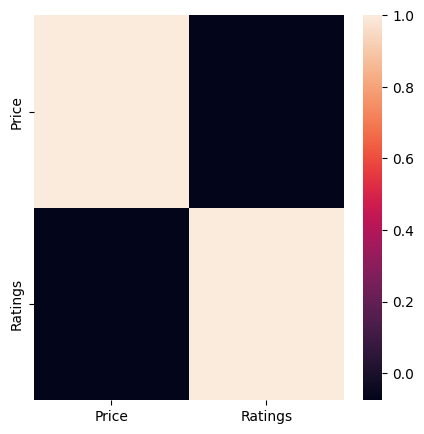

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5,5))
sns.heatmap(df.corr())